In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from __future__ import division

import os

import numpy as np

from glob import glob

import reduce_dblspec 
import pipeline

from astropy.io import fits
from astropy import units as u
from astropy import modeling
from astropy.table import Table

from astropy import modeling
from astropy import constants as cnst

# Dispersion Solutions - only need 1.0" for targets

## RED 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Red side


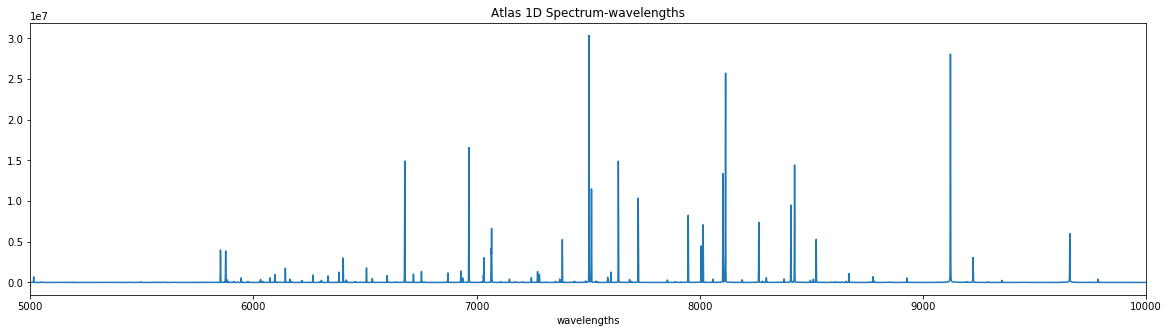

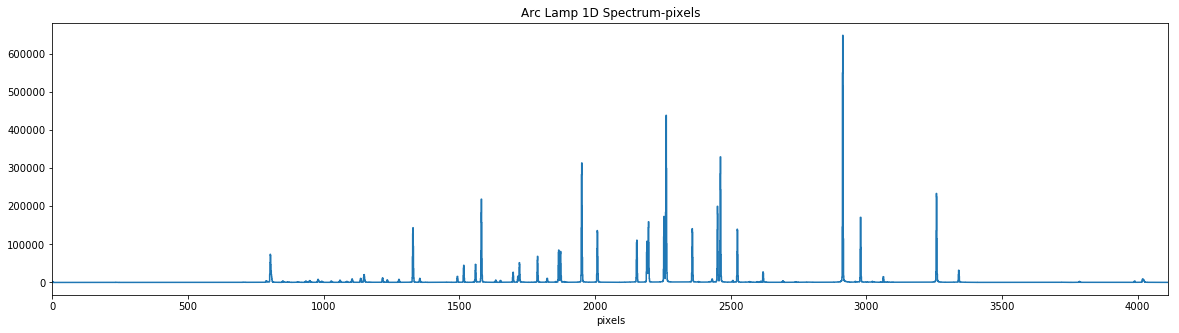

In [2]:
#fix by redefining flats object id for 1.0" & 1.5" slits for red and blue sides
#*******this may be same problem for one of other objects observed (m?) in original nb


#nameing all the datafiles needed
all_side_files_red10 = 'DoubleSpec/20151109/red*.fits' #redside
atlasfiles_red10 = fits.open('henear.fits') #NOAO atlas #redside
arcfiles_red10 = 'DoubleSpec/20151109/red0012.fits' #redside
linelist_red10 = reduce_dblspec.HENEAR_LINE_LIST
flatid = 'DomeFlats 1p0' #this is for 1.0" slit only

specset_red10 = pipeline.dispersion(all_side_files_red10, atlasfiles_red10, arcfiles_red10, linelist_red10,flatid)

In [3]:
#notes re fixing 'DomeFlat' id tag if needed later


#fixed list index out of range error due to domeflats 
#not having the same object name as in previous nights
#note also complicated b/c all zip files that need to be unzipped before can use

#explored here
#t=fits.open('DoubleSpec/20151109/red0058.fits')
#t[0].header

#this lets me fix it and see how many flats there are
#flats = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim() for fn in 
#          reduce_dblspec.find_all_obj('DomeFlats 1p5',all_side_files_red10)[:10]]
#flats #this yielded 5 flats

#frame 0049 begins new ID 'Dome Flats 1p0 for a 1.0" slit, 1p5 is for 1.5" slit
#^^^true for red and blue sides

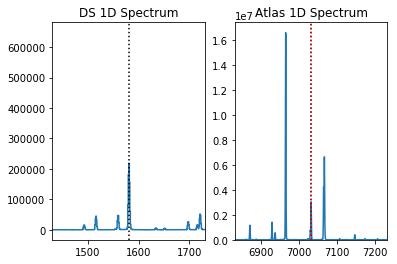

In [4]:
#collecting guesses of matching lines from above graphs

#entering(px,wl)guesses & data
pipeline.guess_plot(1580,7032.4131,specset_red10) #outputs (pixel guess, nearest wl/id in linelist)

#collect guesses here ~5 seems good
pixel_guesses_red10 = [2911,2260,1949,3256]#,1580]
atlas_lines_red10 = [9122.9674,8115.311,7635.106,9657.7863]#,7032.4131,]
guesses_red10 = list(zip(pixel_guesses_red10, atlas_lines_red10)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for redside
chose guesses for redside
Skipping line HeI at wl=3187.745 - out of wl min/max
Skipping line ArII at wl=3307.2283 - out of wl min/max
Skipping line ArI at wl=3319.3446 - out of wl min/max
Skipping line ArII at wl=3350.9243 - out of wl min/max
Skipping line HeI at wl=3354.55 - out of wl min/max
Skipping line ArI at wl=3373.4823 - out of wl min/max
Skipping line ArII at wl=3376.4359 - out of wl min/max
Skipping line ArII at wl=3388.5309 - out of wl min/max
Skipping line NeII at wl=3397.866 - out of wl min/max
Skipping line ArI at wl=3406.1804 - out of wl min/max
Skipping line ArII at wl=3414.4583 - out of wl min/max
Skipping line NeI at wl=3417.9035 - out of wl min/max
Skipping line ArII at wl=3421.6107 - out of wl min/max
Skipping line ArII at wl=3454.0952 - out of wl min/max
Skipping line ArII at wl=3464.1272 - out of wl min/max
Skipping line NeI at wl=3472.5711 - out of wl min/max
Skipping line ArII at wl=3476.7474 - out of wl min/max
Skipping line ArII at wl=3480

Failed to find line ArI at wl=7948.1764: "Guessed line's peak to base ratio is 8.625630582376273, which is less than 10"
Failed to find line ArI at wl=8006.1567: "Guessed line's peak to base ratio is 7.795072684931403, which is less than 10"
Failed to find line ArI at wl=8014.7857: "Guessed line's peak to base ratio is 9.486555120237183, which is less than 10"
Failed to find line KrI at wl=8059.5038: "Guessed line's peak to base ratio is 0.9489822995221208, which is less than 10"
Found line ArI at wl=8103.6931
Clipped 0 lines
Found line ArI at wl=8115.311
Clipped 0 lines
Failed to find line KrI at wl=8190.0543: "Tried to find peak at 2310.0789249696636 but it's in a valley, not a peak"
Found line ArI at wl=8264.5225
Clipped 0 lines
Failed to find line KrI at wl=8281.0495: "Guessed line's peak to base ratio is 1.0532252774831508, which is less than 10"
Failed to find line NeI at wl=8377.6065: "Guessed line's peak to base ratio is 4.479077362304524, which is less than 10"
Found line ArI 

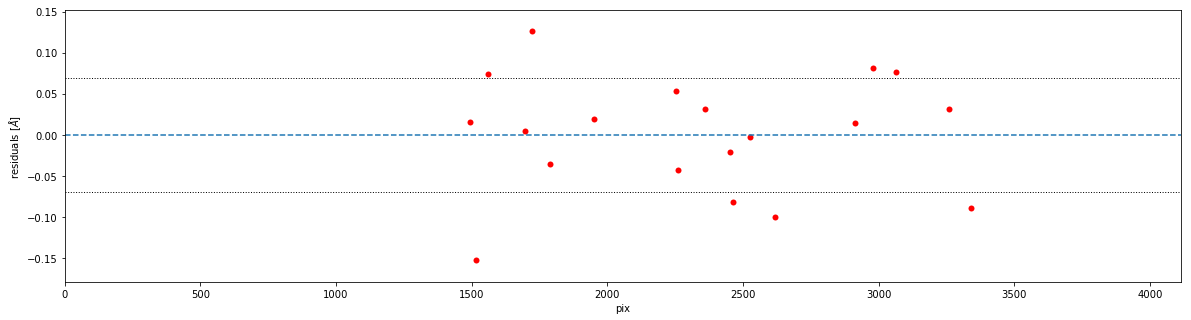

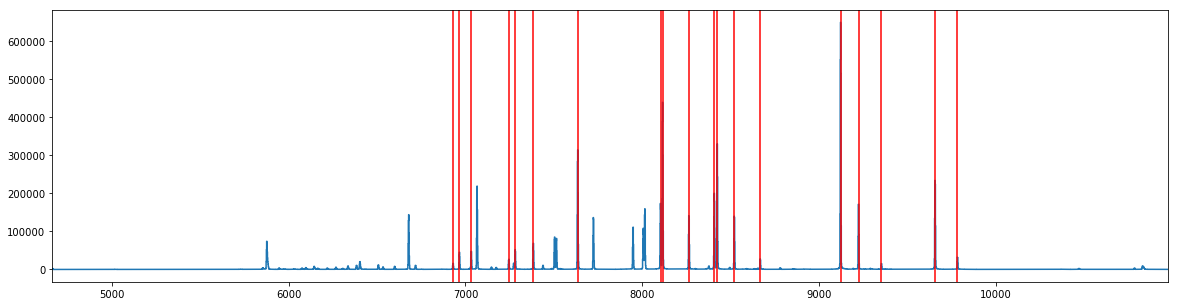

In [5]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution

ds_red10 = pipeline.goodness_of_matches(arcfiles_red10,guesses_red10,all_side_files_red10,atlasfiles_red10,linelist_red10,flatid)

## Blue 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Blue side


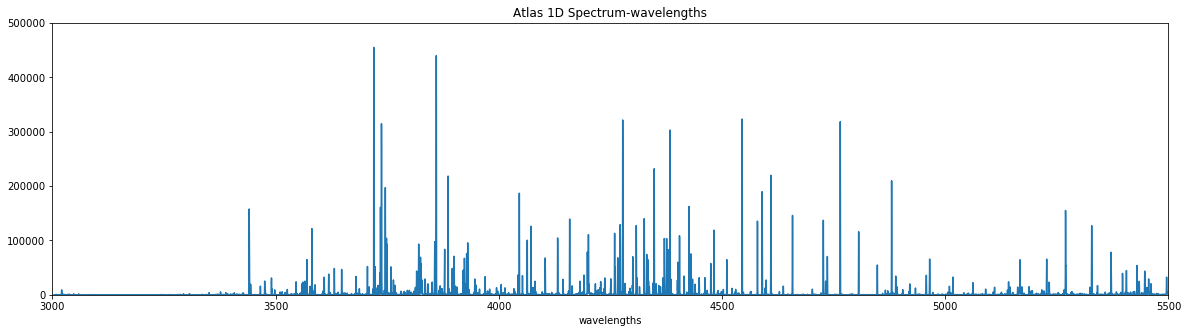

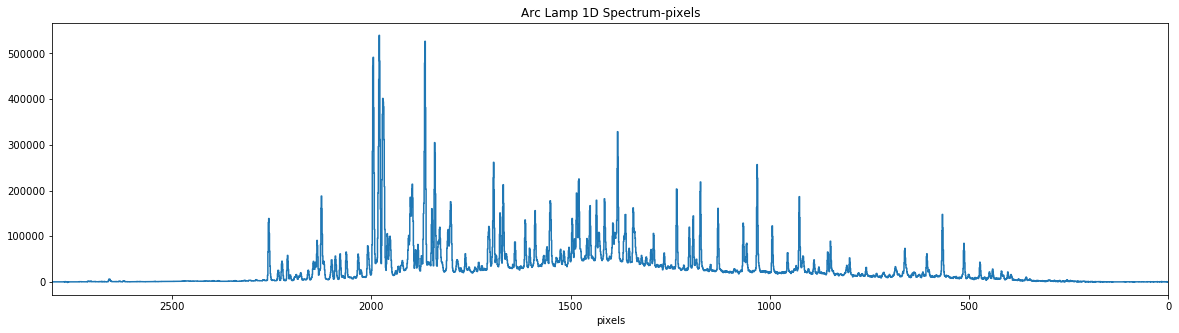

In [6]:
all_side_files_blue10 = 'DoubleSpec/20151109/blue*.fits' #blueside
atlasfiles_blue10 = fits.open('fear.fits') #NOAO atlas #blueside
arcfiles_blue10 = 'DoubleSpec/20151109/blue0012.fits' #blueside
linelist_blue10 = reduce_dblspec.FEAR_LINE_LIST #must be in this form cant use'fear.dat'--debug later
flatid = 'DomeFlats 1p0'

specset_blue10 = pipeline.dispersion(all_side_files_blue10, atlasfiles_blue10, arcfiles_blue10, linelist_blue10,flatid)

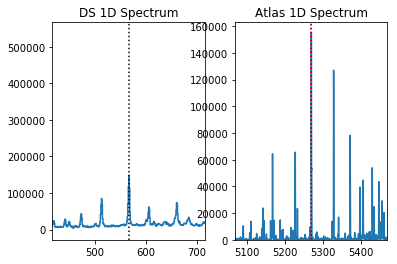

In [7]:
pipeline.guess_plot(566,5269,specset_blue10) #(px,wl)

#collect guesses here but comment them out to see output of matches from line above
pixel_guesses_blue10 = [566,1031,2125,1995] #,1657
atlas_lines_blue10 = [5269.5366,4764.8646,3581.1925,3719.9346] #,4045.8130

guesses_blue10 = list(zip(pixel_guesses_blue10, atlas_lines_blue10)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for blueside
chose guesses for blueside
Failed to find line FeI at wl=3020.6391: "Tried to find peak at 2660.661788531274 but it's in a valley, not a peak"
Found line FeI at wl=3024.0325
Clipped 0 lines
Failed to find line FeI at wl=3037.3887: "Guessed line's peak to base ratio is 1.8703996530102316, which is less than 5"
Failed to find line FeI at wl=3047.6043: "Guessed line's peak to base ratio is 2.736494653576352, which is less than 5"
Failed to find line FeI at wl=3057.4456: "Guessed line's peak to base ratio is 0.701361853507269, which is less than 5"
Failed to find line FeI at wl=3059.0856: "Guessed line's peak to base ratio is 3.7322343198871626, which is less than 5"
Failed to find line FeI at wl=3225.785: "Guessed line's peak to base ratio is 1.4811561355149383, which is less than 5"
Failed to find line ArII at wl=3243.6887: "Guessed line's peak to base ratio is 1.1466947798043234, which is less than 5"
Failed to find line ArII at wl=3350.9243: "Guessed line's peak t

Failed to find line ArII at wl=4439.4614: "Guessed line's peak to base ratio is 1.779999824607159, which is less than 5"
Failed to find line ArII at wl=4448.8792: "Guessed line's peak to base ratio is 2.757882600296244, which is less than 5"
Failed to find line FeI at wl=4461.6521: "Guessed line's peak to base ratio is 2.800441532091249, which is less than 5"
Failed to find line FeI at wl=4466.5508: "Guessed line's peak to base ratio is 1.0915659902376726, which is less than 5"
Failed to find line ArII at wl=4474.7594: "Guessed line's peak to base ratio is 3.6069855253086995, which is less than 5"
Found line ArII at wl=4481.8107
Clipped 0 lines
Failed to find line FeI at wl=4489.7389: "Guessed line's peak to base ratio is 1.7582795460639353, which is less than 5"
Failed to find line ArII at wl=4490.9816: "Guessed line's peak to base ratio is 1.7582795460639353, which is less than 5"
Failed to find line ArII at wl=4498.5384: "Guessed line's peak to base ratio is 1.1684340854134947, whic

Skipping line ArI at wl=6090.7848 - out of wl min/max
Skipping line ArI at wl=6098.8031 - out of wl min/max
Skipping line ArI at wl=6105.6351 - out of wl min/max
Skipping line ArII at wl=6114.9234 - out of wl min/max
Skipping line ArII at wl=6123.3619 - out of wl min/max
Skipping line ArI at wl=6127.416 - out of wl min/max
Skipping line ArI at wl=6145.4411 - out of wl min/max
Skipping line ArI at wl=6155.2385 - out of wl min/max
Skipping line ArI at wl=6165.1232 - out of wl min/max
Skipping line ArII at wl=6170.174 - out of wl min/max
Skipping line FeI at wl=6172.2778 - out of wl min/max
Skipping line ArII at wl=6191.5583 - out of wl min/max
Skipping line ArI at wl=6201.1002 - out of wl min/max
Skipping line ArI at wl=6212.5031 - out of wl min/max
Skipping line FeI at wl=6215.9383 - out of wl min/max
Skipping line ArII at wl=6230.726 - out of wl min/max
Skipping line FeI at wl=6243.1201 - out of wl min/max
Skipping line ArI at wl=6246.3172 - out of wl min/max
Skipping line FeI at wl=62

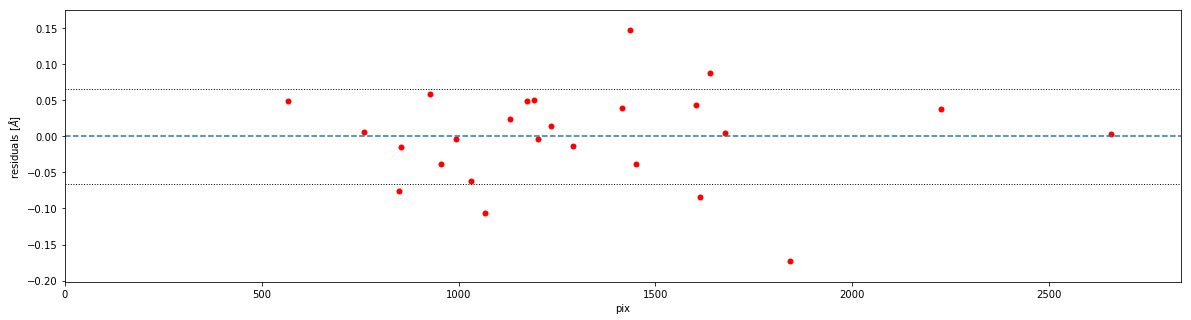

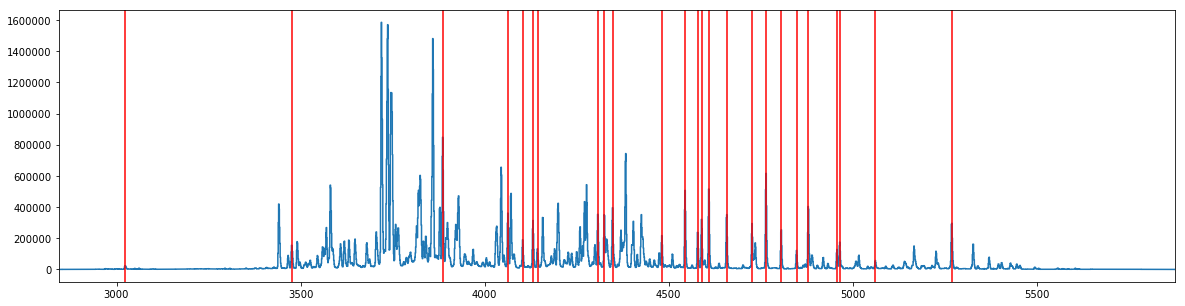

In [8]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution
ds_blue10 = pipeline.goodness_of_matches(arcfiles_blue10,guesses_blue10,all_side_files_blue10,atlasfiles_blue10,linelist_blue10,flatid) #yay looks good FINALLY!!

### Targets

## Catch22-1

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


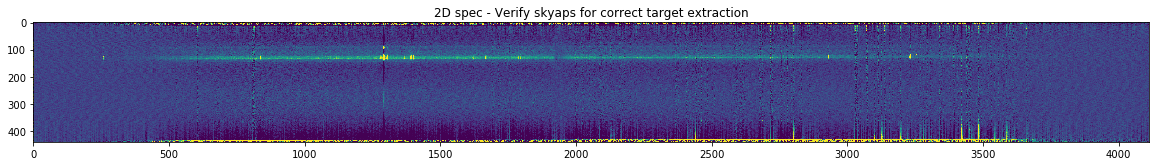

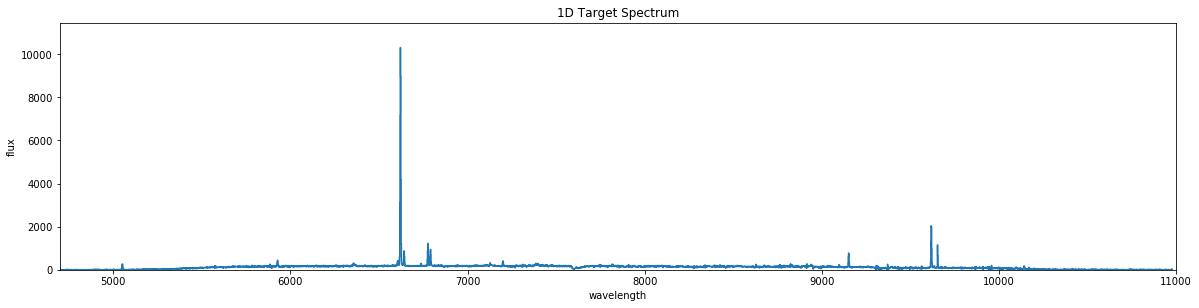

In [9]:
#names of targets and slit size
#Catch22-1  1.0"
#Catch22-2
#Catch22-3
#Beowulf-1,2,3,4
#check Iliad-1 check google sheet, ask erik?





#RED SIDE 1.0 only
#naming files needed
targetID_red10 = 'Catch22_1'
skyaps_red10 = [(60,110),(180,350)] #210-350
all_side_files_target = 'DoubleSpec/20151109/red*.fits'
flatid = 'DomeFlats 1p0'
specaps=(105,130)#((120,135))#90-105
vmax = 40
vmin = -10
model = ('poly',3)#'linear'

flux_red10,unc,comb = pipeline.sky_subtract(targetID_red10,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)

In [10]:
t = fits.open('DoubleSpec/20151109/red0091.fits')
t[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4141 / length of data axis 1                          
NAXIS2  =                  440 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'Catch22_1'       

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


1 target files located
choose 2D spec for blueside
choose 1D target spec axis limits for blueside


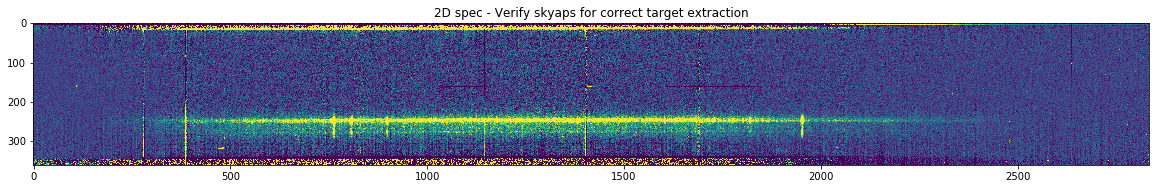

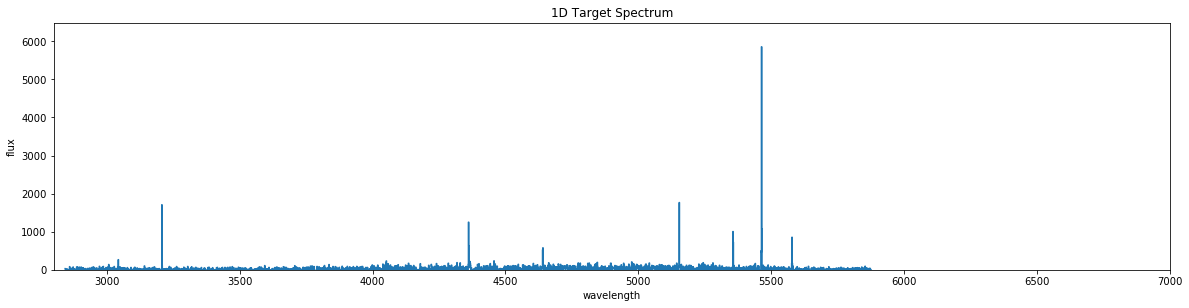

In [11]:
#BLUE SIDE 1.0 only

#naming files needed
targetID_blue10 = 'Catch22_1'
skyaps_blue10 = [(60,110),(180,210)]
all_side_files_target = 'DoubleSpec/20151109/blue*.fits'
flatid = 'DomeFlats 1p0'
specaps = ((290,310)) # NOTE PROBLEM FOR SOME REASON THESE NEED TO BE DOUBLE ()
#these are the 'good' values for these unless need to tweak
vmax = 40
vmin = -10
#specaps=(,)
model='linear'

#290-310
flux_blue10,unc,comb = pipeline.sky_subtract(targetID_blue10,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)

this is the complete 1D flux array:


(-500, 25000)

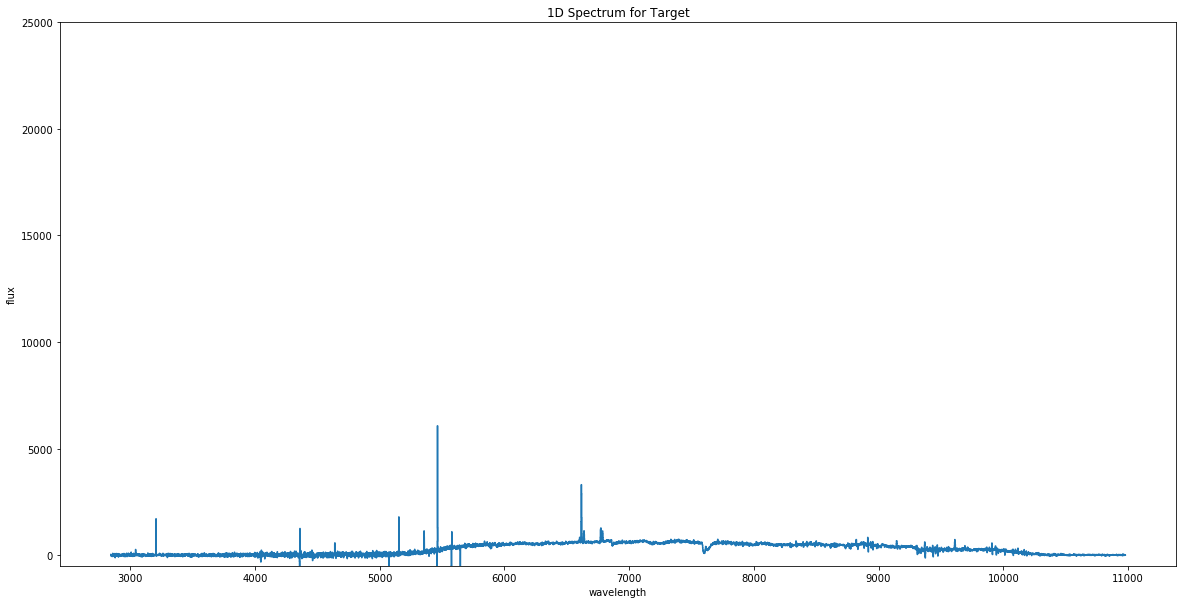

In [18]:
#combine sides here
plt.figure(figsize=(20,10))
pipeline.combine_red_blue(ds_red10,ds_blue10,flux_red10,flux_blue10)
plt.ylim(-500,25000)

## Catch22-2

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


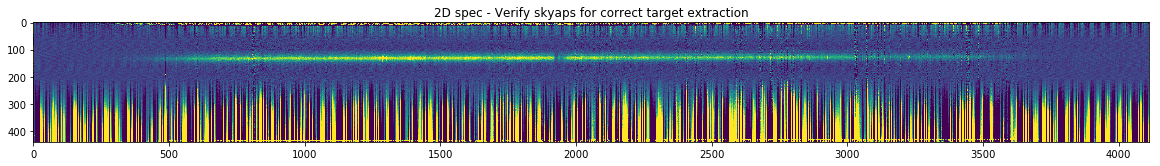

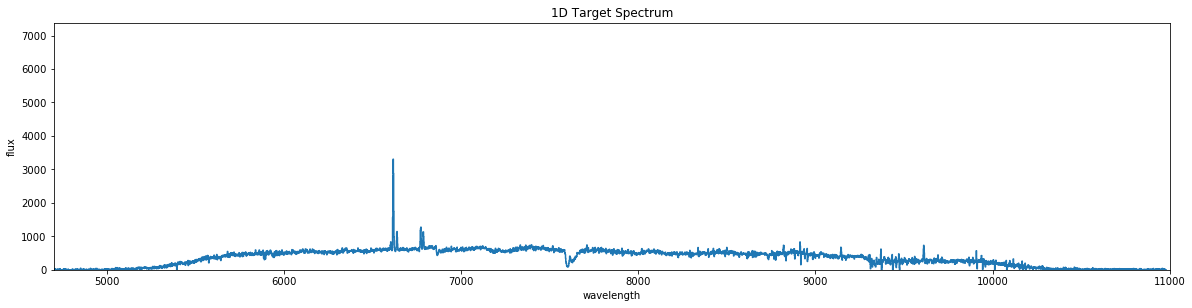

In [17]:

#RED SIDE 1.0 only

#naming files needed
targetID_red10_2 = 'Catch22_2'
skyaps_red10_2 = [(60,110),(180,210)]
all_side_files_target = 'DoubleSpec/20151109/red*.fits'
flatid = 'DomeFlats 1p0'
specaps = (110,140)#((290,310)) # NOTE PROBLEM FOR SOME REASON THESE NEED TO BE DOUBLE ()
#these are the 'good' values for these unless need to tweak
vmax = 40
vmin = -10
#specaps=(,)
model_2=('poly',3)

#290-310
flux_red10,unc,comb = pipeline.sky_subtract(targetID_red10_2,skyaps_red10_2,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model_2)

this is the complete 1D flux array:


(-500, 25000)

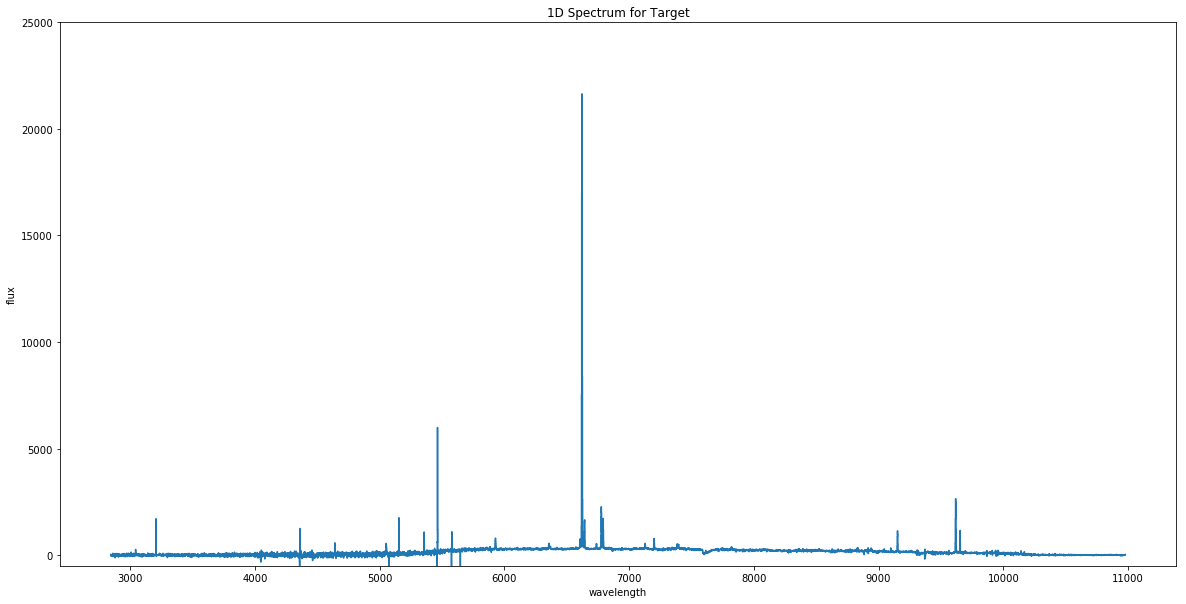

In [13]:
#do blue side here

In [ ]:
#combine sides here

## Catch22-3

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


1 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


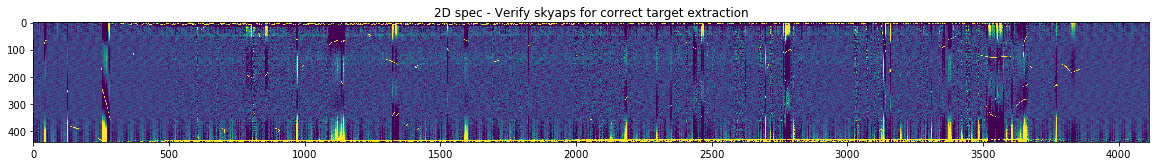

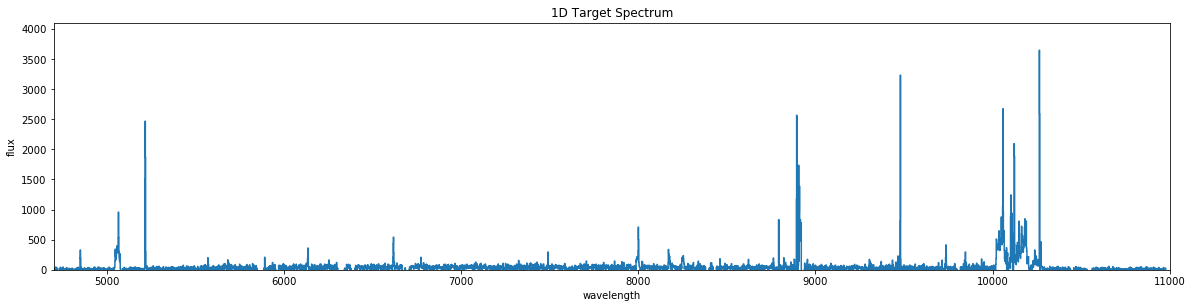

In [24]:
#RED SIDE 1.0 only
#naming files needed
targetID_red10_3 = 'Catch22_3'
skyaps_red10_3 = [(60,110),(180,350)] #210-350
all_side_files_target = 'DoubleSpec/20151109/red*.fits'
flatid = 'DomeFlats 1p0'
specaps=(105,130)#((120,135))#90-105
vmax = 40
vmin = -10
model_3 = ('poly',3)#'linear'

flux_red10,unc,comb = pipeline.sky_subtract(targetID_red10_3,skyaps_red10_3,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model_3)

In [ ]:
#do blue side here

In [ ]:
#combine sides here

## Beowulf-1

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


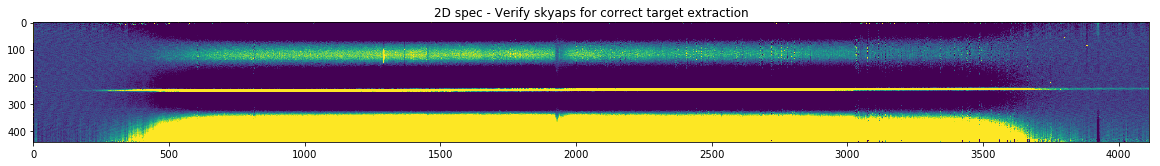

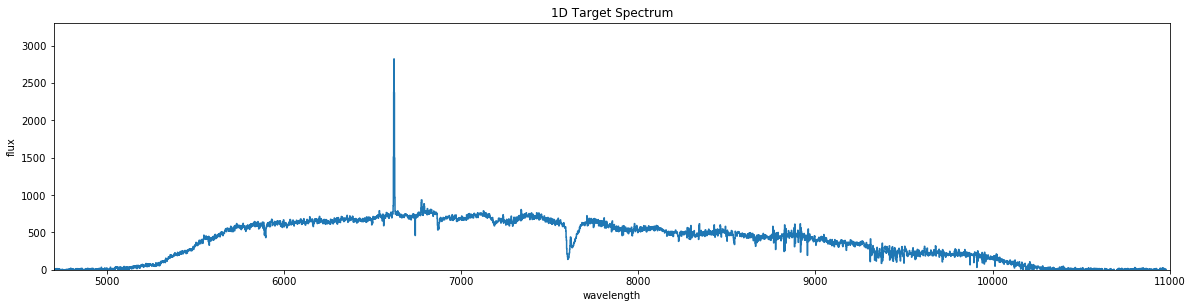

In [27]:
#RED SIDE 1.0 only
#naming files needed
targetID_red10_b1 = 'Beowulf_1'
skyaps_red10_b1 = [(60,110),(180,350)] #210-350
all_side_files_target = 'DoubleSpec/20151109/red*.fits'
flatid = 'DomeFlats 1p0'
specaps=(105,130)#((120,135))#90-105
vmax = 40
vmin = -10
model_b1 = ('poly',3)#'linear'

flux_red10,unc,comb = pipeline.sky_subtract(targetID_red10_b1,skyaps_red10_b1,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model_b1)

In [ ]:
#do blue side here

In [ ]:
#combine sides here

## Beowulf_2

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


2 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


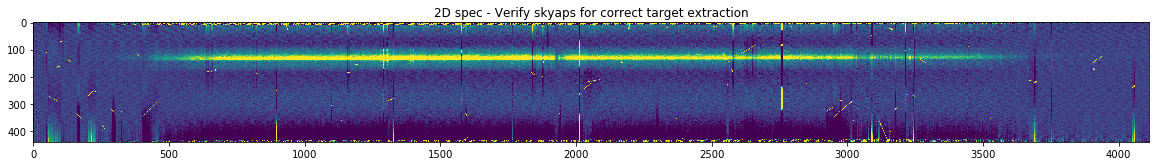

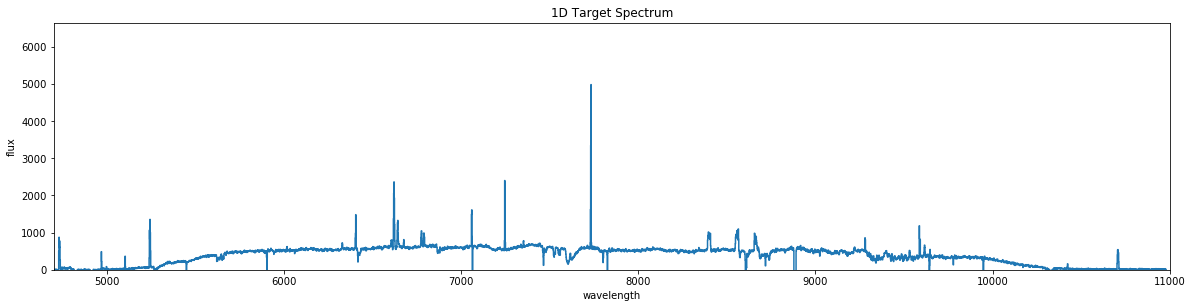

In [30]:
#RED SIDE 1.0 only
#naming files needed
targetID_red10_b2 = 'Beowulf_2'
skyaps_red10_b2 = [(40,110),(180,350)] #210-350
all_side_files_target = 'DoubleSpec/20151109/red*.fits'
flatid = 'DomeFlats 1p0'
specaps=(105,130)#((120,135))#90-105
vmax = 40
vmin = -10
model_b2 = ('poly',3)#'linear'

flux_red10,unc,comb = pipeline.sky_subtract(targetID_red10_b2,skyaps_red10_b2,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model_b2)

In [ ]:
#do blue side here

In [ ]:
#combine sides here

## Beowulf_3

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located
choose 2D spec for redside
choose 1D target spec axis limits for redside


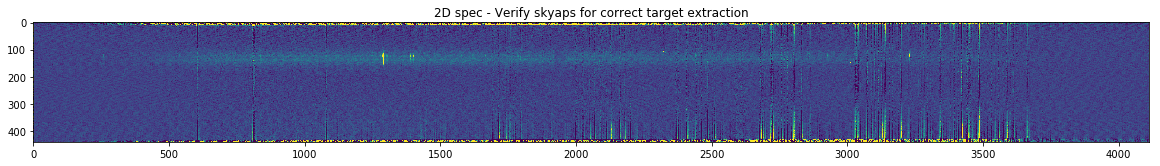

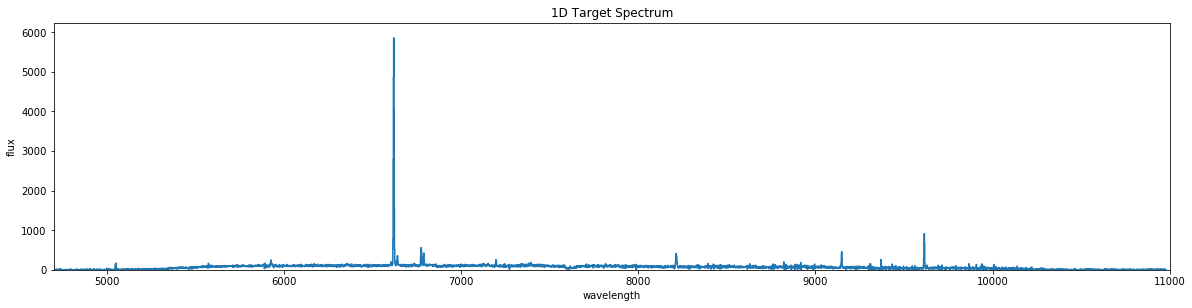

In [35]:
#RED SIDE 1.0 only
#naming files needed
targetID_red10_b3 = 'Beowulf_3'
skyaps_red10_b3 = [(60,110),(180,350)] #210-350
all_side_files_target = 'DoubleSpec/20151109/red*.fits'
flatid = 'DomeFlats 1p0'
specaps=(105,130)#((120,135))#90-105
vmax = 40
vmin = -10
model_b3 = ('linear')#('poly',2)#'linear'

flux_red10,unc,comb = pipeline.sky_subtract(targetID_red10_b3,skyaps_red10_b3,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model_b3)

In [ ]:
#do blue side here

In [ ]:
#combine sides here

## Beowulf_4

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


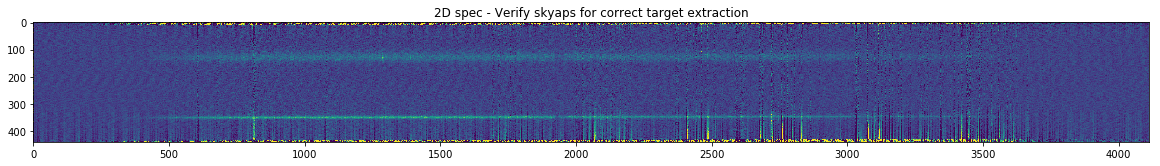

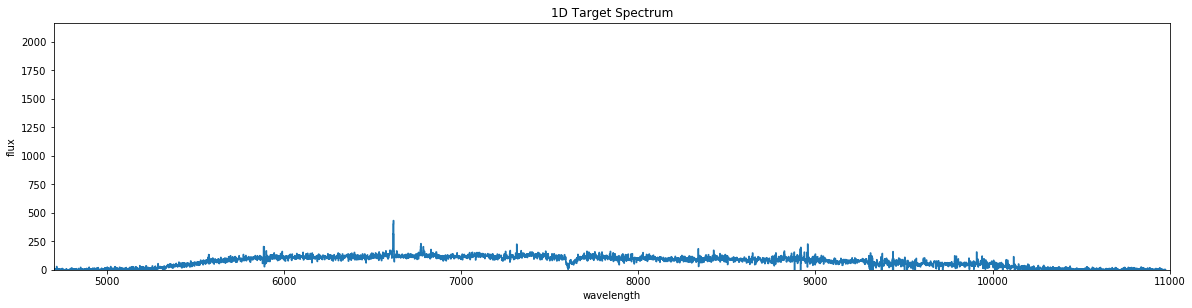

In [40]:
#RED SIDE 1.0 only
#naming files needed
targetID_red10_b4 = 'Beowulf_4'
skyaps_red10_b4 = [(60,110),(180,300)] #210-350
all_side_files_target = 'DoubleSpec/20151109/red*.fits'
flatid = 'DomeFlats 1p0'
specaps=(105,130)#((120,135))#90-105
vmax = 40
vmin = -10
model_b4 = ('poly',2)#'linear'

flux_red10,unc,comb = pipeline.sky_subtract(targetID_red10_b4,skyaps_red10_b4,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model_b4)

In [ ]:
#do blue side here

In [ ]:
#combine sides here

In [37]:
t = fits.open('DoubleSpec/20151109/red0129.fits')
t[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4141 / length of data axis 1                          
NAXIS2  =                  440 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'Beowulf_4'       